In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

sns.set_style('whitegrid')

In [98]:
# Step 1: Upload kaggle (2).json
from google.colab import files
uploaded = files.upload()


Saving kaggle (2).json to kaggle (2).json


In [99]:
# Step 2: Move and rename it to ~/.kaggle/kaggle.json
import os

# Create the .kaggle folder if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move uploaded file (it will be named exactly "kaggle (2).json")
!mv "kaggle (2).json" ~/.kaggle/kaggle.json

# Set permissions (important!)
!chmod 600 ~/.kaggle/kaggle.json


In [100]:
# Step 3: Use Kaggle Hub to download dataset
import kagglehub
import pandas as pd

print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load CSV from dataset
file_path = f"{path}/heart_disease_uci.csv"
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()


Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [101]:
df.info()
df.describe()
df.isnull().sum()
df['ca'].value_counts()
skewness = df['exang'].skew()
print("Skewness:", skewness)




# Rule of thumb:
# If |skewness| > 0.5 → Consider median


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Skewness: 0.45358176309305254


In [102]:
# fixing numerical missing values
median_trestbps = df['trestbps'].median()
df['trestbps'].fillna(median_trestbps, inplace=True)

median_chol = df['chol'].median()
df['chol'].fillna(median_chol, inplace=True)

median_thalch = df['thalch'].median()
df['thalch'].fillna(median_thalch, inplace=True)

median_oldpeak = df['oldpeak'].median()
df['oldpeak'].fillna(median_oldpeak, inplace=True)

median_ca = df['ca'].median()
df['ca'].fillna(median_ca, inplace=True)



/tmp/ipython-input-60775597.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(median_trestbps, inplace=True)
/tmp/ipython-input-60775597.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [103]:
#fixing categorical missing values
df['fbs'] = df['fbs'].astype('object')
df['fbs'].fillna('unknown',inplace = True)

df['restecg'].fillna(0,inplace = True)

df['slope'] = df['slope'].astype('object')
df['slope'].fillna('missing',inplace= True)

df['thal'] = df['thal'].astype('object')
df['thal'].fillna('missing',inplace= True)

mode_exang = df['exang'].mode()
df['exang'].fillna(mode_exang[0],inplace=True)

/tmp/ipython-input-3478321633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna('unknown',inplace = True)
/tmp/ipython-input-3478321633.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [104]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


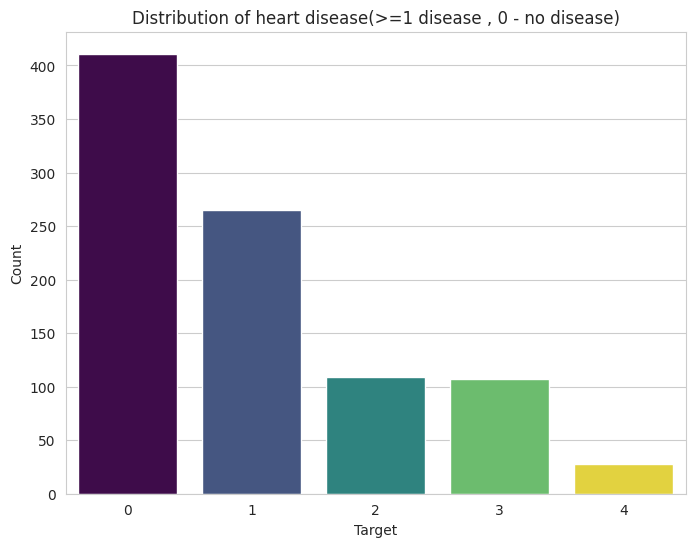

In [105]:
plt.figure(figsize=(8,6))
sns.countplot(x='num',data=df,palette ='viridis',hue='num',legend=False)
plt.title('Distribution of heart disease(>=1 disease , 0 - no disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

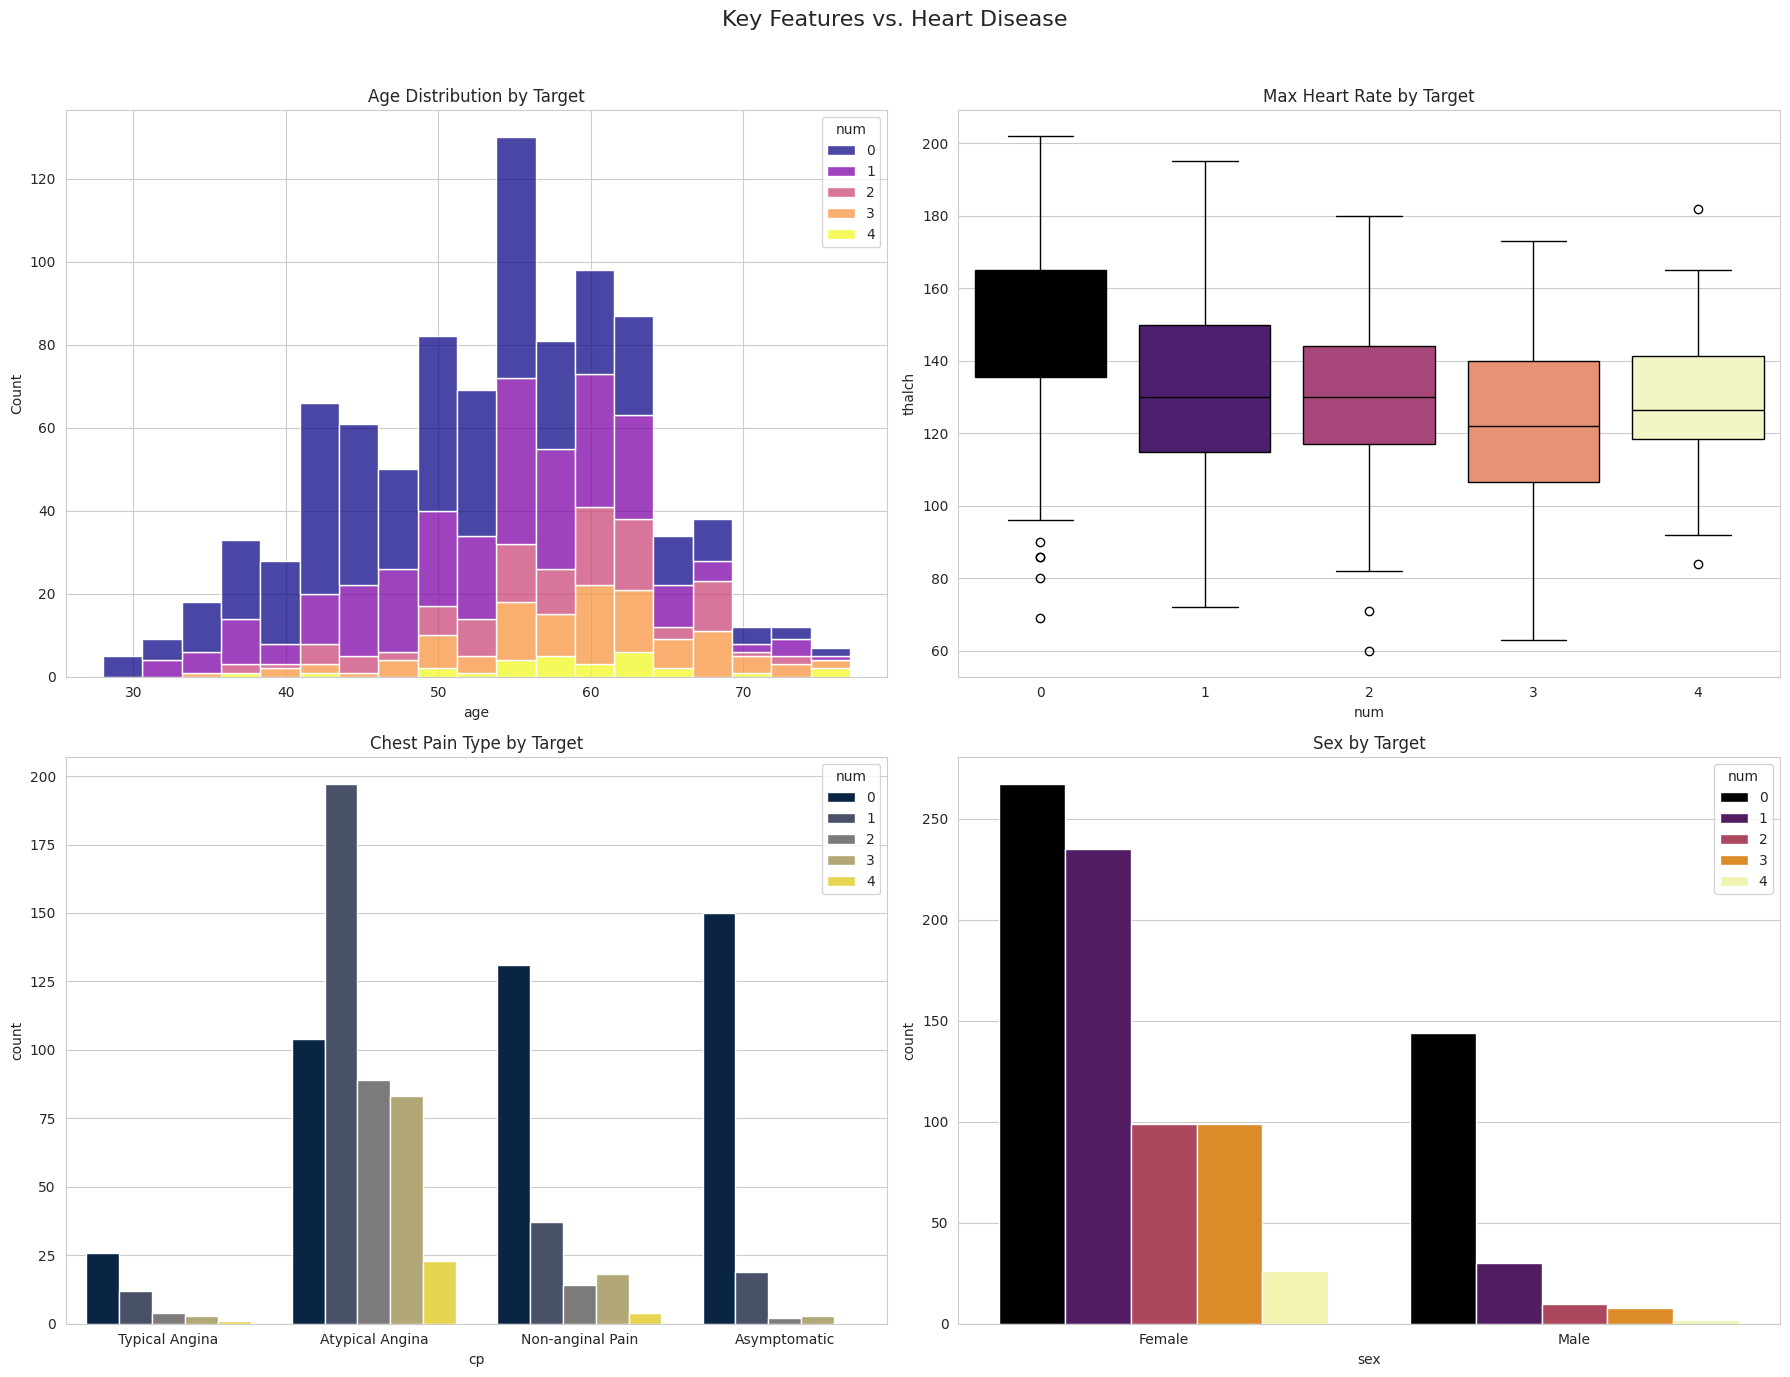

In [106]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

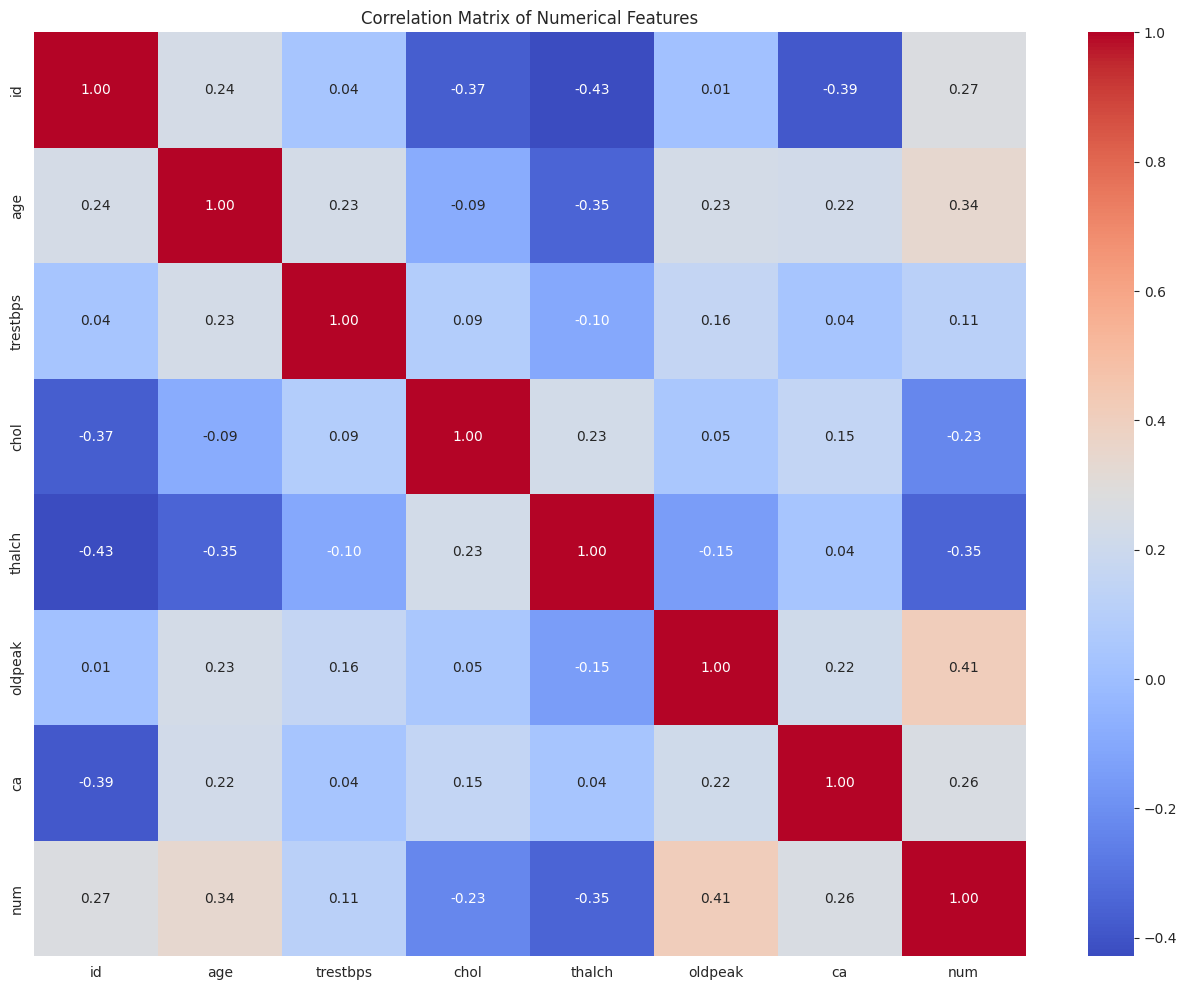

In [107]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [128]:
# with 4 categories
#X= df.drop('num',axis=1)
##y= df['num']
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Redefine target as binary

# with only Two categories disease and no disease
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Keep features
X = df.drop('num', axis=1)

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)



In [129]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Drop unnecessary columns properly
X = X.drop(['id', 'dataset'], axis=1, errors='ignore')

# Separate numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing: StandardScaler for numeric, OneHotEncoder for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)




In [130]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("=== Logistic Regression Performance ===")
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


=== Logistic Regression Performance ===
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        82
           1       0.76      0.77      0.77       102

    accuracy                           0.74       184
   macro avg       0.74      0.73      0.74       184
weighted avg       0.74      0.74      0.74       184

Confusion Matrix:
 [[57 25]
 [23 79]]


In [131]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("=== Random Forest Performance ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest Performance ===
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        82
           1       0.77      0.80      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.76      0.75       184

Confusion Matrix:
 [[57 25]
 [20 82]]


In [132]:
from sklearn.svm import SVC

# SVM Pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("=== Support Vector Machine (SVM) Performance ===")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


=== Support Vector Machine (SVM) Performance ===
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        82
           1       0.77      0.79      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.76      0.75       184

Confusion Matrix:
 [[58 24]
 [21 81]]


In [133]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print("=== K-Nearest Neighbors (KNN) Performance ===")
print(classification_report(y_test, y_pred_knn, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


=== K-Nearest Neighbors (KNN) Performance ===
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        82
           1       0.76      0.77      0.77       102

    accuracy                           0.74       184
   macro avg       0.74      0.73      0.74       184
weighted avg       0.74      0.74      0.74       184

Confusion Matrix:
 [[57 25]
 [23 79]]


                     Accuracy  Precision    Recall        F1
Logistic Regression  0.739130   0.738618  0.739130  0.738786
Random Forest        0.755435   0.754726  0.755435  0.754515
SVM                  0.755435   0.754827  0.755435  0.754928
KNN                  0.739130   0.738618  0.739130  0.738786


<Figure size 1000x600 with 0 Axes>

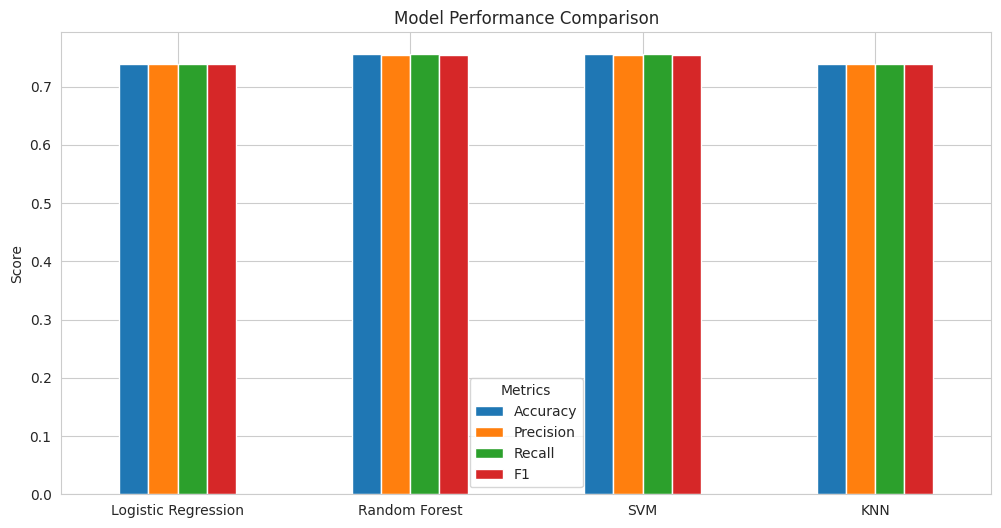

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect evaluation metrics
results = {
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr, average='weighted'),
        recall_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted')
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ],
    "SVM": [
        accuracy_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ],
    "KNN": [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1"]).T
print(results_df)

# Plot comparison
plt.figure(figsize=(10,6))
results_df.plot(kind='bar', figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


Conclusion:

1.Multiclass (0–4 severity levels)

Accuracy only ~54% due to class imbalance (few samples in classes 2–4).

Not reliable for practical use without advanced balancing techniques.

2.Binary (0 = No Disease, 1 = Disease)

Accuracy improved to ~75–76% across all models.

Random Forest & SVM performed slightly better than Logistic Regression & KNN.